# El propósito de este notebook es explorar las primeras diez variables del dataset. 

Se utiliza el approach de 'divide and conquer' de los algoritmos para analizar las variables importantes. 

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas_profiling

In [12]:
data = pd.read_csv('casas_entrena.csv')

In [13]:
data.head()
#Observamos que son demasiadas columnas 

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,120,RM,NaN,3072,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,WD,Normal,225000
1,120,RL,53.0,4045,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,246578
2,120,RL,43.0,3013,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,213490
3,120,RL,53.0,3922,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2007,New,Partial,172500
4,120,RL,NaN,3196,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,215000


In [31]:
data.shape

(1467, 80)

# Eliminando Outliers

Como dice en el pdf: 

**There are five observations that an instructor may wish to remove from the data set before giving it to students (a plot of SALE PRICE versus GR LIV AREA will quickly indicate these points).** 

**Three of them are true outliers (Partial Sales that likely don’t represent actual market values) and two of them are simply unusual sales (very large houses priced relatively appropriately).**

 **I would recommend removing any houses with more than 4000 square feet from the data set (which eliminates these five unusual observations) before assigning it to students.**

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

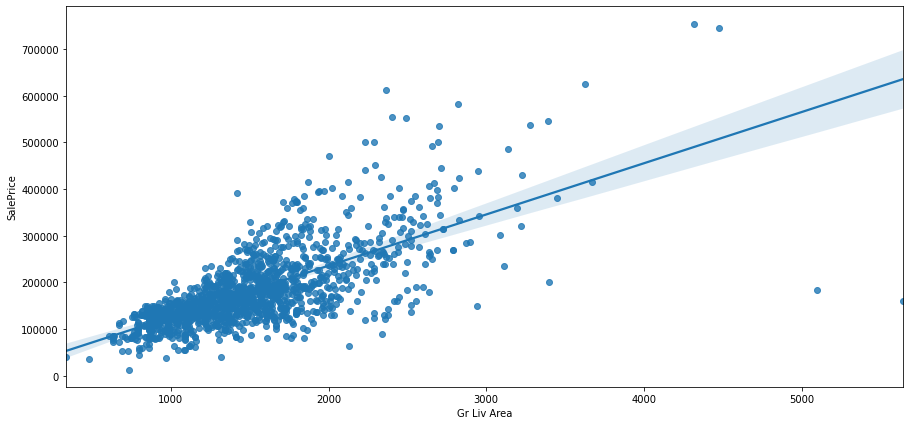

In [39]:
#Outliers
x = data['Gr Liv Area']
y = data['SalePrice']
fig, ax = plt.subplots(figsize = (15,7))
sns.regplot(x,y, ax = ax)

Con lo de "más de 4,000" pies, el autor se refiere a Gr. Living Area. Podemos ver que aquí están los outliers. 

In [46]:
data[data['Gr Liv Area'] > 4_000]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
324,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
354,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
842,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
847,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


### Seleccionamos solo las primeras diez. 

In [14]:
data_short = data.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,79]]
data_short.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,SalePrice
0,120,RM,NaN,3072,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,225000
1,120,RL,53.0,4045,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,246578
2,120,RL,43.0,3013,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,213490
3,120,RL,53.0,3922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,172500
4,120,RL,NaN,3196,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,215000


In [19]:
#quick check a ver si hay outliers
data_short.sort_values(by = ['Lot Area'], ascending = False)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,SalePrice
101,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,CulDSac,Sev,302000
95,20,RL,62.0,70761,Pave,NaN,IR1,Low,AllPub,Inside,Mod,280000
354,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,160000
1443,20,RL,NaN,57200,Pave,NaN,IR1,Bnk,AllPub,Inside,Sev,160000
521,70,I (all),NaN,56600,Pave,NaN,IR1,Low,AllPub,Inside,Gtl,103000
...,...,...,...,...,...,...,...,...,...,...,...,...
537,180,RM,21.0,1526,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,86000
530,160,RM,21.0,1504,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,85500
532,180,RM,21.0,1491,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,75500
541,160,RM,21.0,1476,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,76000


In [76]:
#veamos el pandas profiling
profile = pandas_profiling.ProfileReport(data_short, title = "Primeras 10 variables contra el precio.")
profile.to_widgets()

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:4304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [77]:
profile.to_notebook_iframe()

### Este reporte nos permite tomar mejores decisiones.

Vayamos una por una, en la exploración de las variables, con el fin de determinar de mejor manera cuáles nos conviene tirar y cuáles no. 

In [20]:
data_short.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'SalePrice'],
      dtype='object')

### 1 - MS SubClass
Esta variable habla sobre el tipo de vivienda. Yo creo que no vale la pena crear 15 variables dummy por ella,
pero vamos a mantenerla. 

Es necesario transformarla a categórica. 

In [21]:
data_short['MS SubClass'] = data_short['MS SubClass'].astype('category')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
data_short['MS SubClass'].value_counts()

20     544
60     277
50     141
120    100
70      69
80      68
30      68
160     61
90      56
190     31
85      19
45      11
180      9
75       9
40       3
150      1
Name: MS SubClass, dtype: int64

Intentemos ver si hay una relación o no. 

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='MS SubClass', ylabel='SalePrice'>

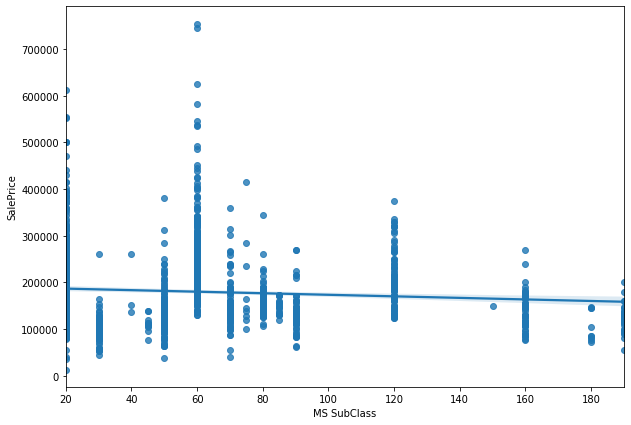

In [30]:
x = data_short['MS SubClass'].astype(int)
y = data_short['SalePrice']
fig, ax = plt.subplots(figsize = (10,7))
sns.regplot(x,y, ax = ax)

Yo digo que no vale la pena consevarla. Para cada tipo de clase hay precios muy distintos. Y aunque es cierto que los de la clase 20 y 60 tienen precios más altos, no vale la pena tener las 16 categorías. En todo caso, podríamos dividirla en otras 2: "Clase Alta" y "Clase Baja", para no tener 15 dummies.

### MS Zoning

Quizá valga la pena conservarla para ver si valen más las casas en zonas menos densas.

In [24]:
data_short.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,SalePrice
0,120,RM,NaN,3072,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,225000
1,120,RL,53.0,4045,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,246578
2,120,RL,43.0,3013,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,213490
3,120,RL,53.0,3922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,172500
4,120,RL,NaN,3196,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,215000


/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='SalePrice'>

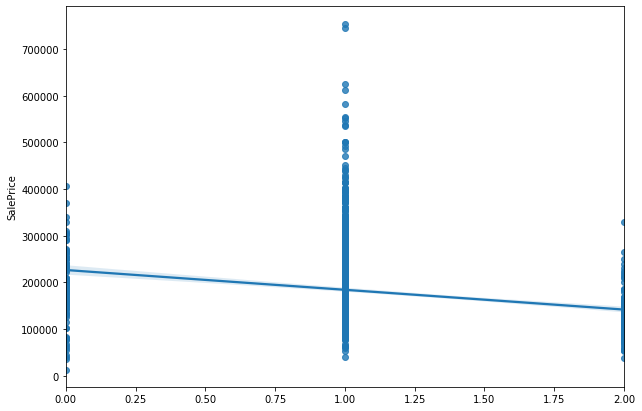

In [47]:
z = np.where(data['MS Zoning'] == "RM", 2, np.where(data['MS Zoning'] == "RL", 1, 0))
x = z
y = data_short['SalePrice']
fig, ax = plt.subplots(figsize = (10,7))
sns.regplot(x,y, ax = ax)

Sí podemos ver que las casas con un residencial más bajo (el 1 equivale a RL que es residential low density)
  pueden tener precios más altos. Yo lo que haría sería crear una variable dummy que sea 1 si es Low Density y 0 en caso contrario. 

### Lot Frontage

"Linear feet of street connected to property". 
¿Qué tanto explicará el precio?

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Lot Frontage', ylabel='SalePrice'>

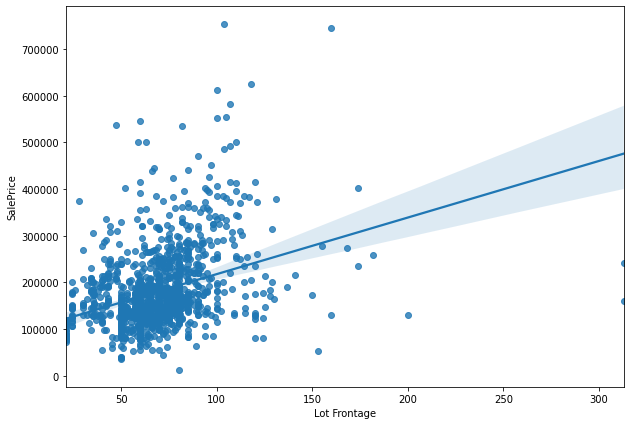

In [28]:
x = data_short['Lot Frontage']
y = data_short['SalePrice']
fig, ax = plt.subplots(figsize = (10,7))
sns.regplot(x,y, ax = ax)


Yo creo que esta la podemos tirar. 

### Street y Alley las tiramos. 

Alley tiene 92 % de datos nulos y en street prácticamente el 98% de los datos tienen un solo valor. 

### Lot Shape, Land Contour, Utilities y Lot Config y Land Slope se van también. 

El reporte lo explica bien y también el diccionario de datos. No es relevante la forma del terreno. 

In [48]:
data_short.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'SalePrice'],
      dtype='object')

In [49]:
data_short['Lot Shape'].value_counts()

Reg    929
IR1    495
IR2     36
IR3      7
Name: Lot Shape, dtype: int64

### Las exploramos de todos modos.

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='SalePrice'>

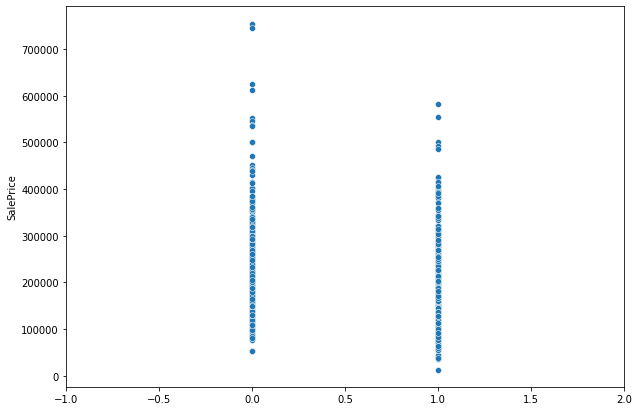

In [54]:
x = np.where(data_short['Lot Shape'] == 'Reg', 1, 0) #1 es regular y 0 son el resto
y = data_short['SalePrice']
fig, ax = plt.subplots(figsize = (10,7))
plt.xlim([-1,2])
sns.scatterplot(x,y, ax = ax)

In [55]:
#Lot Shape se va. 

In [56]:
data_short['Land Contour'].value_counts()

Lvl    1312
HLS      64
Bnk      59
Low      32
Name: Land Contour, dtype: int64

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='SalePrice'>

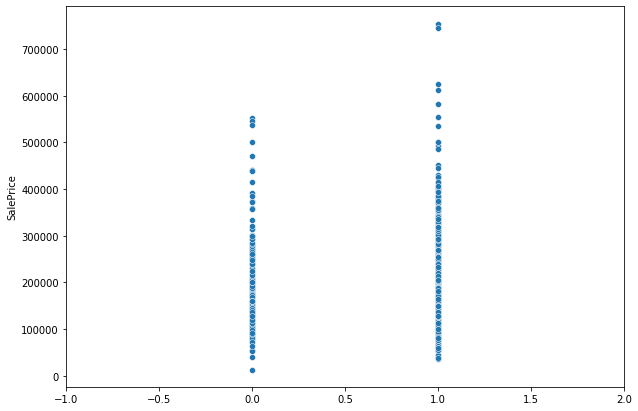

In [57]:
x = np.where(data_short['Land Contour'] == 'Lvl', 1, 0) #1 es regular y 0 son el resto
y = data_short['SalePrice']
fig, ax = plt.subplots(figsize = (10,7))
plt.xlim([-1,2])
sns.scatterplot(x,y, ax = ax)

In [58]:
#Land Contour se va igual! 

In [59]:
data_short['Lot Config'].value_counts()

Inside     1094
Corner      239
CulDSac      83
FR2          42
FR3           9
Name: Lot Config, dtype: int64

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='SalePrice'>

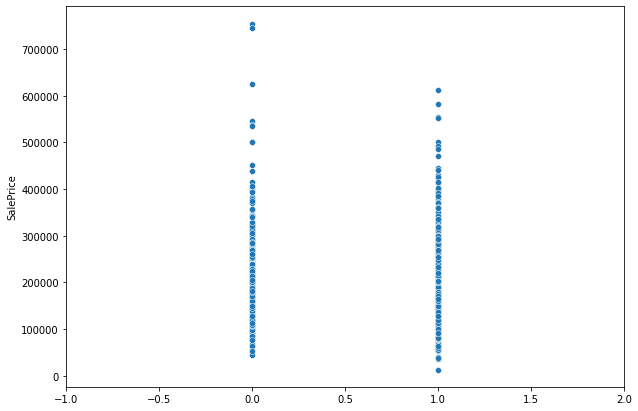

In [65]:
x = np.where(data_short['Lot Config'] == 'Inside', 1, 0)
y = data_short['SalePrice']
fig, ax = plt.subplots(figsize = (10,7))
plt.xlim([-1,2])
sns.scatterplot(x,y, ax = ax)

Las dos de hasta arriba son los outliers. Esta variable da igual.

In [66]:
data_short['Land Slope'].value_counts()

Gtl    1398
Mod      61
Sev       8
Name: Land Slope, dtype: int64

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='SalePrice'>

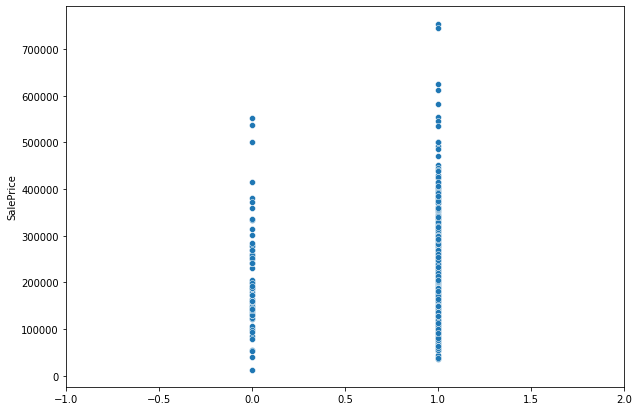

In [67]:
x = np.where(data_short['Land Slope'] == 'Gtl', 1, 0)
y = data_short['SalePrice']
fig, ax = plt.subplots(figsize = (10,7))
plt.xlim([-1,2])
sns.scatterplot(x,y, ax = ax)

In [69]:
data_short.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'SalePrice'],
      dtype='object')

# Resumen. 

De estas primeras 10 variables: ['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'SalePrice'], claramente solo podemos quedarnos con las siguientes:
       
       
       - Lot Area
       - MS Zoning pero si la transformamos a una variable binaria que valga 1 cuando es "RL" (residential low density) y 0 en caso contrario. 
       - Chance MS SubClass pero solo si nos faltan muchas variables explicativas al final (que no creo). 
       - Por lo pronto me quedaría solo con MS Zoning y Lot Area nada más, y transformaría MS Zoning. 

El siguiente notebook tiene el pipeline hasta este momento. 

In [73]:
def clean_dataset(path):
    data = pd.read_csv(path)
    
    #Arreglando tipos de datos
    data['MS SubClass'] = data['MS SubClass'].astype('category')
    data['MS Zoning'] = np.where(data['MS Zoning'] == "RL", 1, 0) #solo ahí se ven diferencias

    #Quitando outliers 
    data = data[data['Gr Liv Area'] < 4_000] #con esto se van todos

    #Eliminando columnas innecesarias
    data = data.drop(columns = ['MS SubClass', 'Lot Frontage', 'Street', 'Alley',
     'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope'])


    #Elminando duplicados
    data = data.drop_duplicates()

(1467, 80)